In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime as dt
import os
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from dtw import dtw
from sklearn.metrics import pairwise_distances
import pickle

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime as dt
import os
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from dtw import dtw
from sklearn.metrics import pairwise_distances
import pickle
PRE_NAME = "onemin_ohlc_"
BEGIN_TIME = "09:00:00"
END_TIME = "11:00:00"
NUM_CLUSTER = 50
def load_data(date_begin='20180612', date_end = '20180928', split_date_begin = '20181001', split_date_end = '20181031', train = True):
    X = []
    Y = []
    # df = pd.read_csv(os.path.join('dataset', '2327', PRE_NAME+"20180612.csv"))
    # mask = (df.loc[:, "time"] >= BEGIN_TIME) & (df.loc[:, "time"] <= END_TIME)
    # front_df = df[mask].loc[:, "return"]
    # end_df = df[~mask].loc[:, "return"]
    # X.append(np.array(front_df))
    # Y.append(np.array(end_df))
    # """我是分隔線^^~"""
    # df = pd.read_csv(os.path.join('dataset', '2327', PRE_NAME+"20180613.csv"))
    # mask = (df.loc[:, "time"] >= BEGIN_TIME) & (df.loc[:, "time"] <= END_TIME)
    # front_df = df[mask].loc[:, "return"]
    # end_df = df[~mask].loc[:, "return"]
    # X.append(np.array(front_df))
    # Y.append(np.array(end_df))
    
    for sid in tqdm(os.listdir(os.path.join('dataset'))):
        for file in os.listdir(os.path.join('dataset', sid)):
            curday = file[12:20]
            if (train == True and curday <= date_end and curday >= date_begin) or (train == False and curday >= split_date_begin and curday <= split_date_end):
                df = pd.read_csv(os.path.join('dataset', sid, file))
                df = df
                mask = (df.loc[:, "time"] >= BEGIN_TIME) & (df.loc[:, "time"] <= END_TIME)
                front_df = df[mask].loc[:, "return"]
                front_df = front_df.take(np.arange(0, len(front_df), 5))
                end_df = df[~mask].loc[:, "return"]
                if len(front_df) == (121 // 5 +1):
                    X.append(np.array(front_df))
                    Y.append(np.array(end_df))
    return np.array(X), np.array(Y)

def dtw_d(X, Y):
    manhattan_distance = lambda x, y: np.abs(x - y)
    d, cost_matrix, acc_cost_matrix, path = dtw(X, Y, dist=manhattan_distance)
    return d

def dtw_affinity(X):
    return pairwise_distances(X, metric=dtw_d)

X, Y = load_data()


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  4.02it/s]


In [40]:
X_test, Y_test = load_data(train=False)


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:01<00:00, 11.77it/s]


In [22]:
print(X.shape)

(417, 25)


In [23]:
print(X_test.shape)

(163, 25)


In [24]:
t1 = time.time()
ac = AgglomerativeClustering(n_clusters = NUM_CLUSTER,
                             affinity = dtw_affinity,
                             linkage = 'complete')
X_label = ac.fit_predict(X)
t2 = time.time()
print(t2-t1)

255.80276155471802


In [25]:
X_label

array([34,  5,  6, 17,  9, 27, 44, 39, 11,  0, 23, 33, 11,  5,  2, 25, 41,
       25, 37, 49, 13, 34, 21, 19, 24, 31, 11, 49,  1, 48, 38, 29,  2,  7,
       30,  2, 25,  1, 10, 40, 14, 28, 11, 42, 47, 15, 42, 13, 22,  2, 18,
        2, 37,  7,  2, 42, 11,  3, 41, 20, 13, 20, 13, 38, 41,  1, 38, 13,
       46, 41, 42, 13,  1,  2, 11, 28, 42, 38, 11, 49, 46, 13, 13, 42, 42,
       32, 42, 42, 46, 13,  1, 46, 41, 10, 24, 43, 20, 10, 46, 42, 49, 13,
       28,  4,  1, 10, 42, 13,  7, 18,  2, 18,  1, 11, 38,  2,  1,  8,  1,
       10, 25, 20, 20, 42, 13,  2, 33,  2, 13, 16, 27, 27, 16, 39, 42, 26,
        0, 11, 29,  1, 19, 46, 18, 28, 46, 18, 25, 12, 13, 40, 49,  6, 21,
       48,  6, 44, 14,  1,  4, 38, 29,  0, 30,  2, 25,  1, 10,  9, 16,  0,
       40, 42, 46, 47, 48, 21, 42,  5,  1, 18, 27, 45, 42,  7,  2,  1, 11,
        3, 13, 41, 20, 13, 32,  1, 10,  2, 49, 46, 12, 41,  4, 10, 13, 42,
       42, 13, 19,  8,  2, 13, 40, 44, 42, 49, 13, 43, 11, 10,  4, 18, 11,
        3, 44,  1, 20, 28

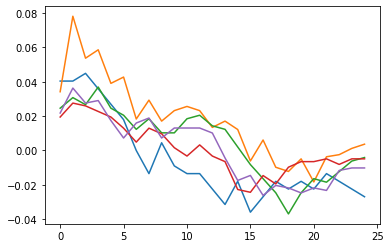

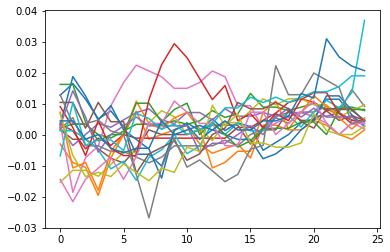

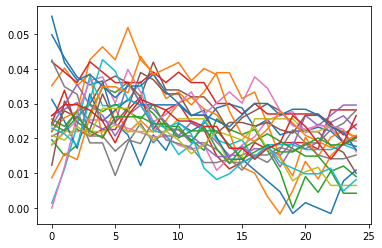

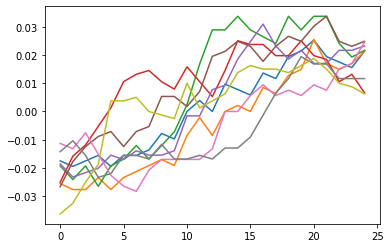

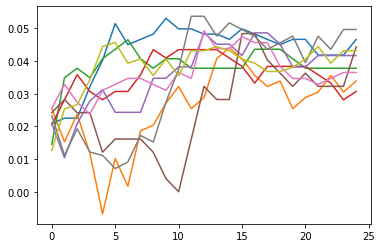

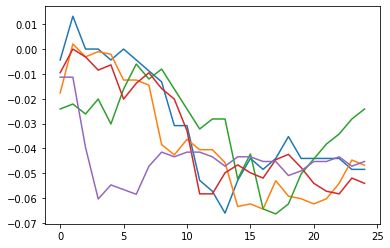

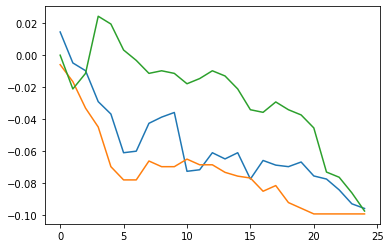

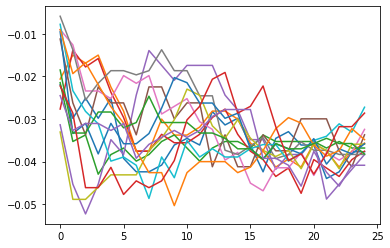

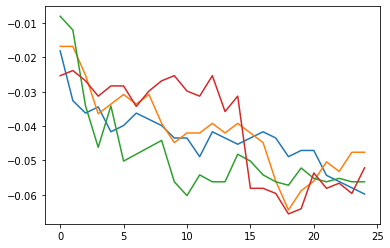

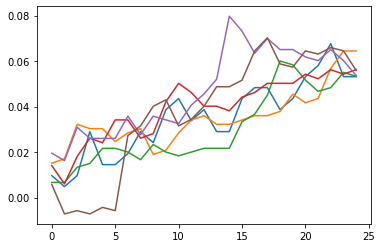

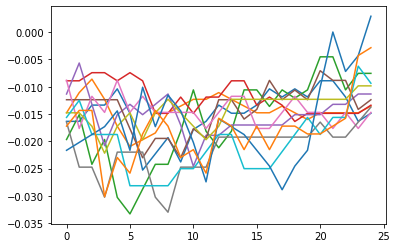

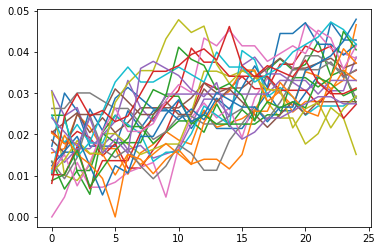

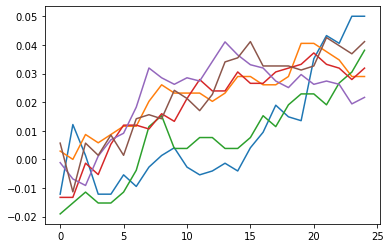

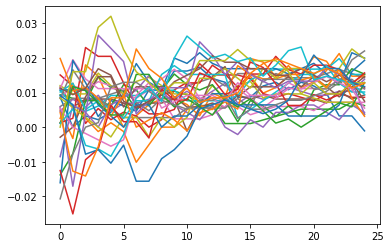

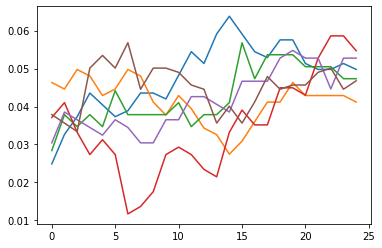

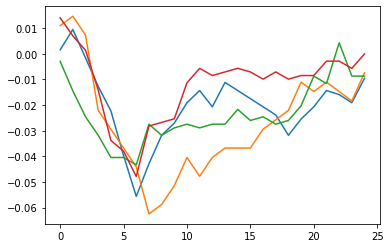

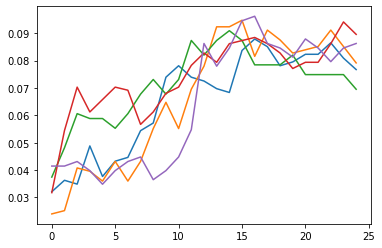

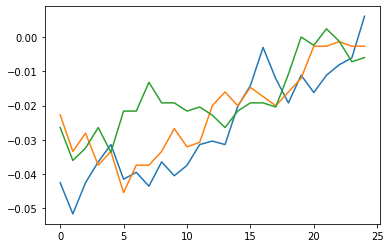

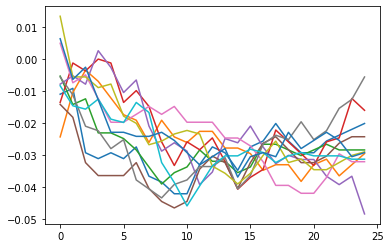

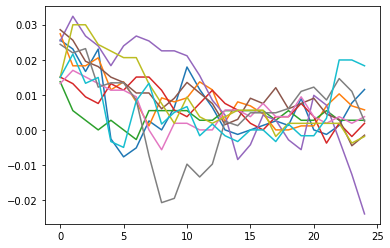

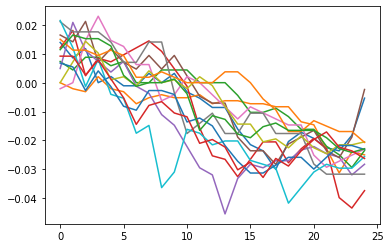

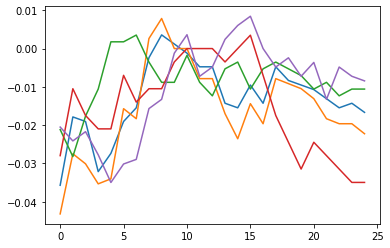

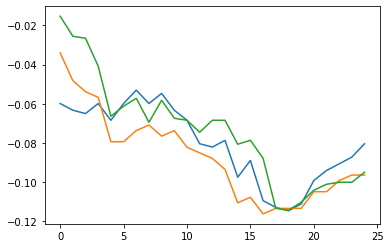

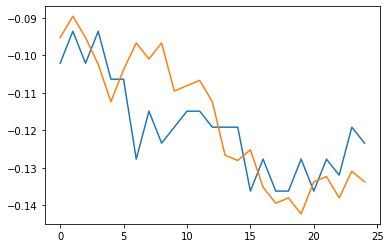

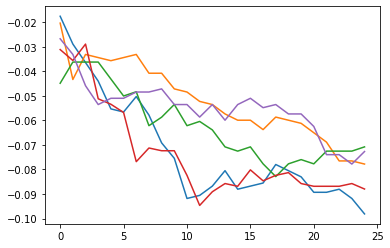

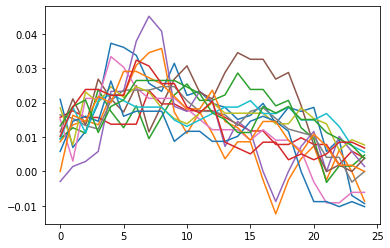

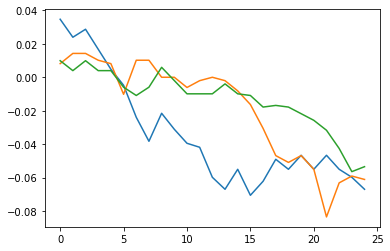

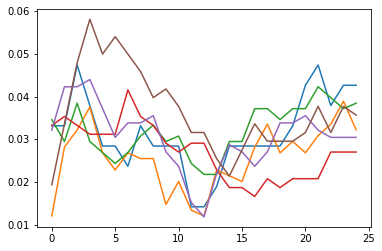

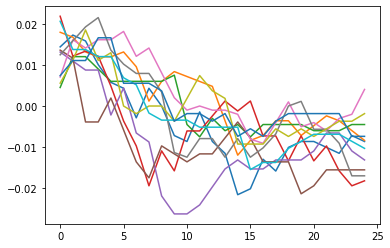

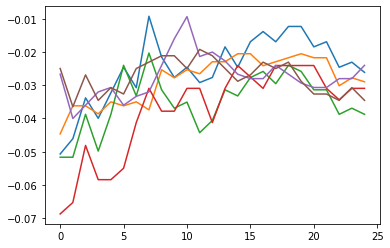

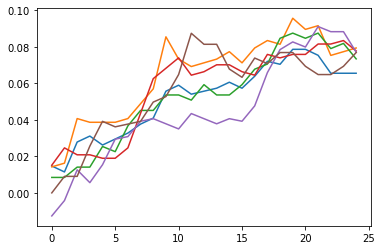

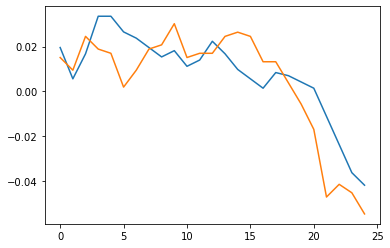

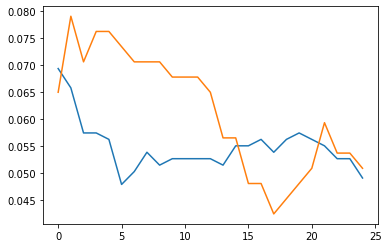

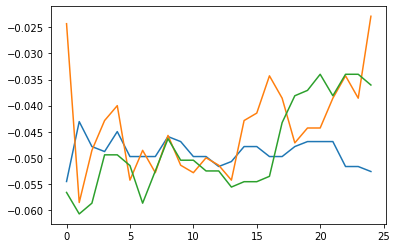

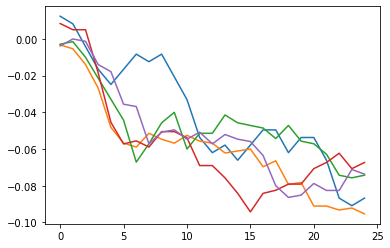

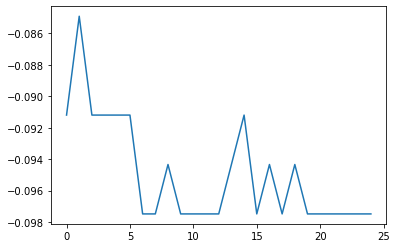

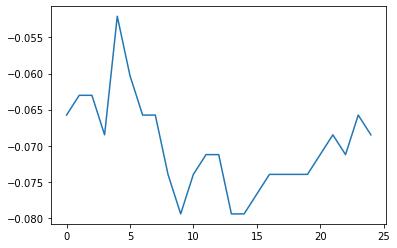

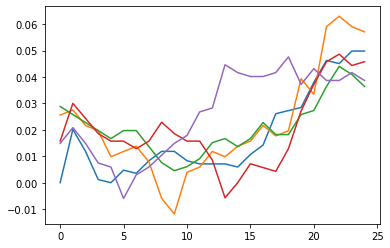

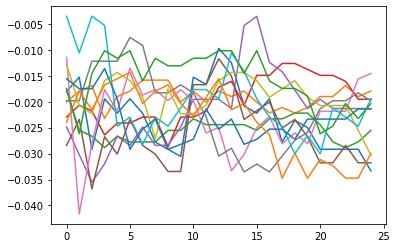

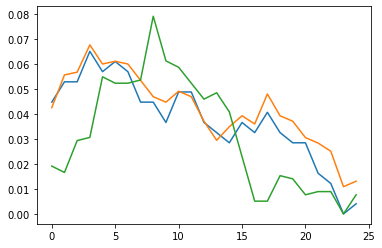

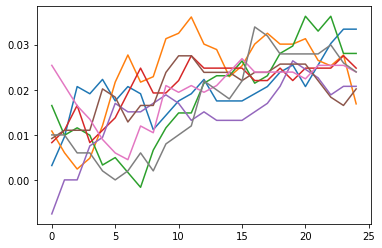

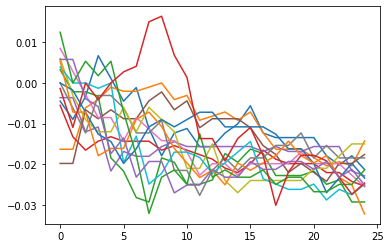

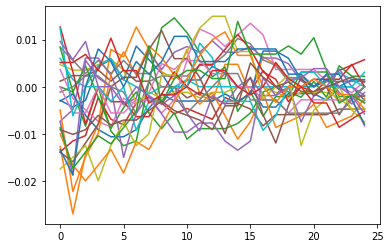

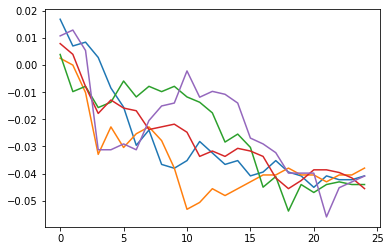

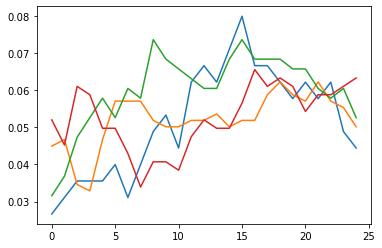

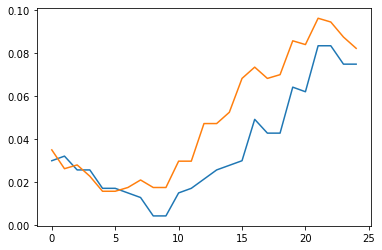

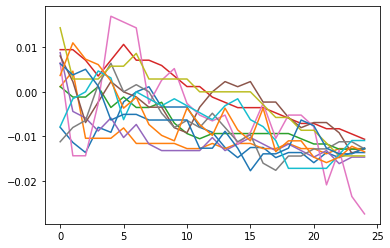

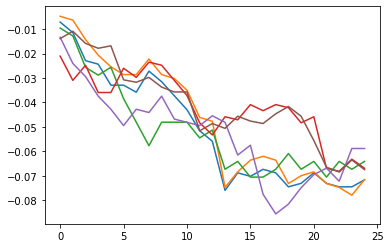

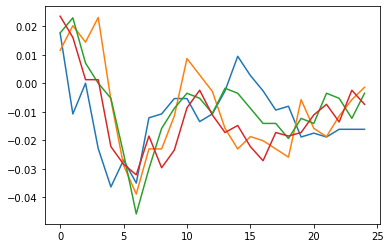

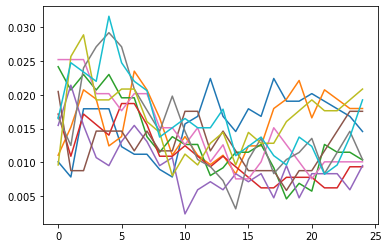

In [26]:
for n in range(NUM_CLUSTER):
    for i in range(len(X)):
    #     plt.subplot(10, 1, X_label[i]+1)
        if X_label[i] == n:
            plt.plot(X[i])
    plt.show()

In [29]:
def make_long_simple(y, cost):
    return y.max() - y[0] - cost
def make_short_simple(y, cost):
    return y[0] - y.min() - cost
def make_long_max_lost(y, cost):
    return y.min() - y[0] - cost
def make_short_max_lost(y, cost):
    return y[0] - y.max() - cost
def make_long(y, cost, exp_profit):
    if np.sum(y-y[0]-cost >= exp_profit):
        return exp_profit
    else:
        return y[-1] - y[0] - cost

def make_short(y, cost, exp_profit):
    if np.sum(y[0]-y-cost >= exp_profit):
        return exp_profit
    else:
        return -y[-1] + y[0] - cost

In [55]:
X_label

array([34,  5,  6, 17,  9, 27, 44, 39, 11,  0, 23, 33, 11,  5,  2, 25, 41,
       25, 37, 49, 13, 34, 21, 19, 24, 31, 11, 49,  1, 48, 38, 29,  2,  7,
       30,  2, 25,  1, 10, 40, 14, 28, 11, 42, 47, 15, 42, 13, 22,  2, 18,
        2, 37,  7,  2, 42, 11,  3, 41, 20, 13, 20, 13, 38, 41,  1, 38, 13,
       46, 41, 42, 13,  1,  2, 11, 28, 42, 38, 11, 49, 46, 13, 13, 42, 42,
       32, 42, 42, 46, 13,  1, 46, 41, 10, 24, 43, 20, 10, 46, 42, 49, 13,
       28,  4,  1, 10, 42, 13,  7, 18,  2, 18,  1, 11, 38,  2,  1,  8,  1,
       10, 25, 20, 20, 42, 13,  2, 33,  2, 13, 16, 27, 27, 16, 39, 42, 26,
        0, 11, 29,  1, 19, 46, 18, 28, 46, 18, 25, 12, 13, 40, 49,  6, 21,
       48,  6, 44, 14,  1,  4, 38, 29,  0, 30,  2, 25,  1, 10,  9, 16,  0,
       40, 42, 46, 47, 48, 21, 42,  5,  1, 18, 27, 45, 42,  7,  2,  1, 11,
        3, 13, 41, 20, 13, 32,  1, 10,  2, 49, 46, 12, 41,  4, 10, 13, 42,
       42, 13, 19,  8,  2, 13, 40, 44, 42, 49, 13, 43, 11, 10,  4, 18, 11,
        3, 44,  1, 20, 28

In [65]:
def make_table(X, X_label):
    X_mean = np.zeros((len(X_label), len(X[0])))
    for i in range(NUM_CLUSTER):
        X_mean[X_label[i]] = X[X_label==i].mean(axis=0)
    return X_mean
X_table = make_table(X, X_label)
pickle.dump(X_tabel, open("X_tabel.pk", "wb"))

In [41]:
len(X)

417

In [44]:
Y.shape

(417,)

In [45]:
profit_long_array = np.zeros(NUM_CLUSTER)
profit_short_array = np.zeros(NUM_CLUSTER)
lost_long_array = np.zeros(NUM_CLUSTER)
lost_short_array = np.zeros(NUM_CLUSTER)
num_long_array = np.zeros(NUM_CLUSTER).astype("int")
num_short_array = np.zeros(NUM_CLUSTER).astype("int")
for i in range(len(X)):
    profit_long_array[X_label[i]] += make_long_simple(Y[i], 0.002)
    profit_short_array[X_label[i]] += make_short_simple(Y[i], 0.002)
    lost_long_array[X_label[i]] += make_long_max_lost(Y[i], 0.002)
    lost_short_array[X_label[i]] += make_short_max_lost(Y[i], 0.002)
    num_long_array[X_label[i]] += 1
    num_short_array[X_label[i]] += 1
print(profit_long_array)
print(profit_short_array)
print(lost_long_array)
print(lost_short_array)
print(num_long_array)
print(num_short_array)

[ 0.20409187  0.30800353  0.28462719  0.07644225  0.04993934  0.12470195
  0.14126705  0.07634955  0.01569636  0.05740614  0.08709828  0.35749992
  0.03786424  0.35460539  0.2018315   0.08499874  0.06425512  0.04726532
  0.09523975  0.13277196  0.15617603  0.04327216  0.01451282  0.0172887
  0.01781414  0.37879592  0.10610114  0.11011395  0.06638412  0.1284084
  0.07030248  0.10261431  0.0012172   0.01138898  0.11277802 -0.002
  0.00073973  0.11375243  0.08378877  0.04120346  0.12754553  0.07172819
  0.11353432  0.05458352  0.08121362  0.03745775  0.12510023  0.0351079
  0.10264673  0.15617705]
[ 0.08431271  0.41021893  0.7380049   0.13420486  0.11928176  0.0507201
 -0.006       0.24846846  0.06888973  0.2241747   0.12571492  0.35809828
  0.10769095  0.2719905   0.05160715  0.02315958  0.04808885  0.06218778
  0.21383874  0.17323576  0.26284791  0.23324046  0.06709896  0.01589044
  0.0745085   0.18381416  0.01734119  0.10873031  0.20443777  0.14792984
  0.08321274  0.03231285  0.058376

In [ ]:
pickle.dump(ac, open("ac_model2.pc", 'wb'))

In [9]:
ac = pickle.load(open("ac_model2.pc", 'rb'))

In [12]:
x_l_p = ac.fit_predict(X)

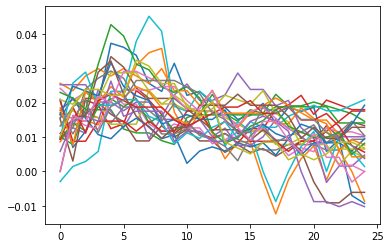

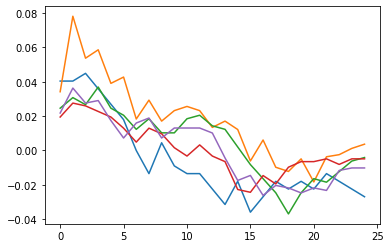

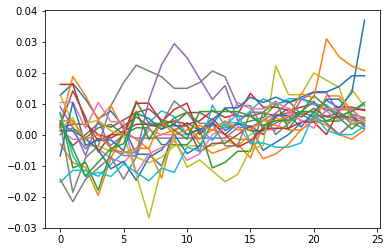

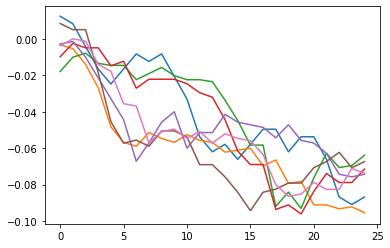

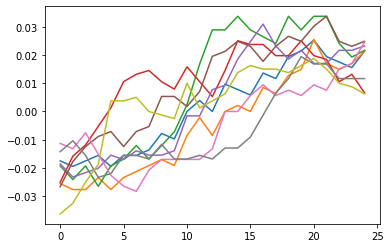

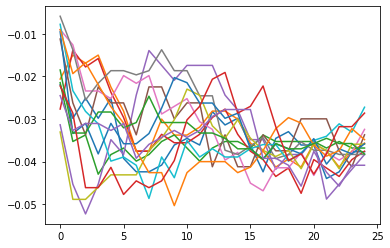

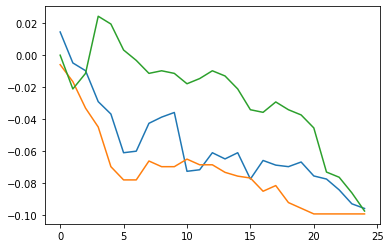

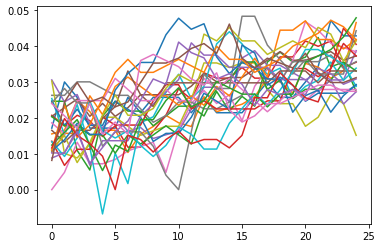

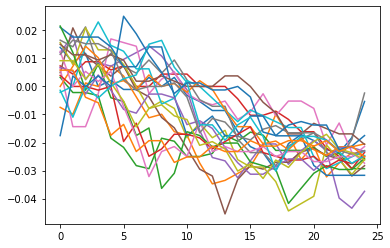

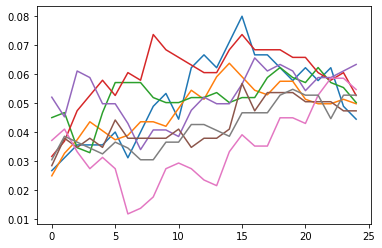

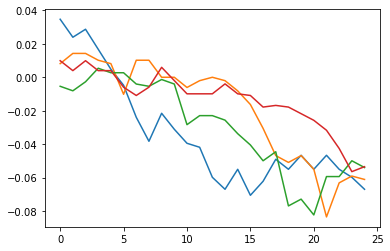

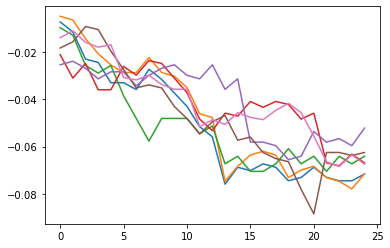

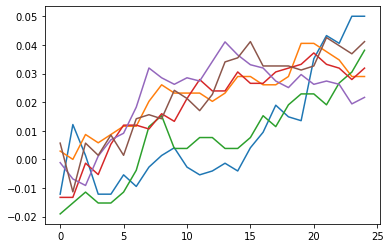

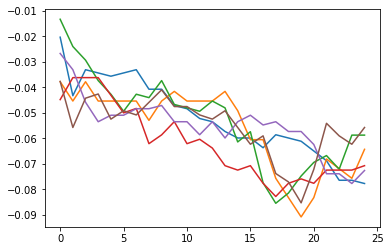

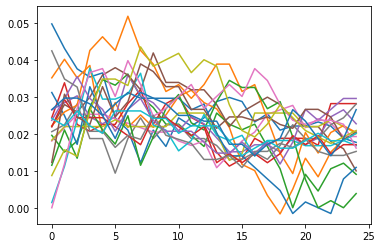

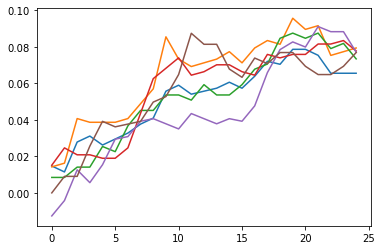

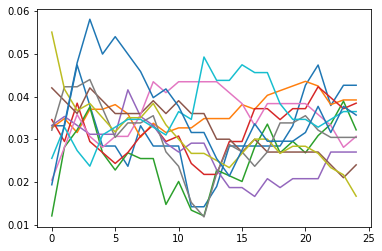

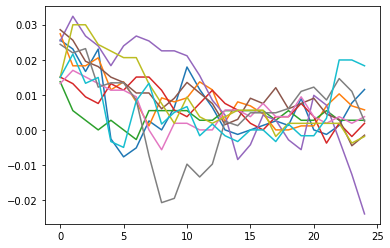

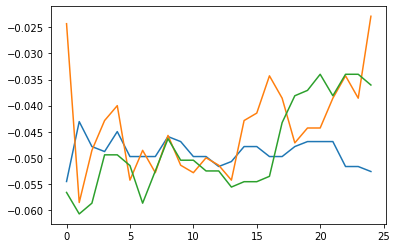

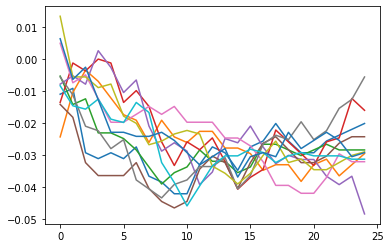

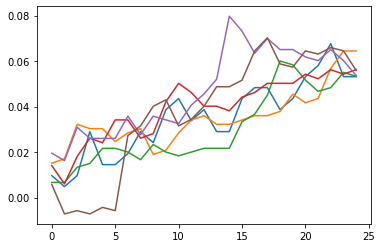

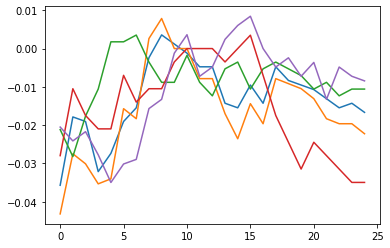

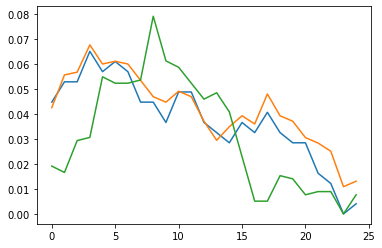

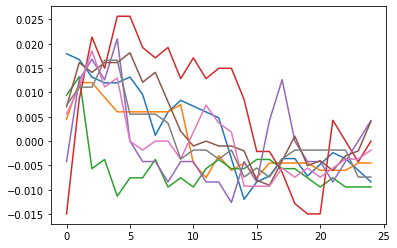

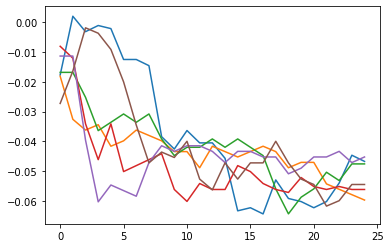

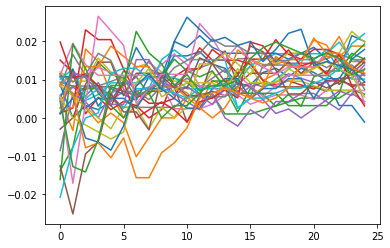

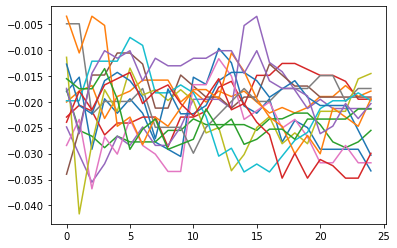

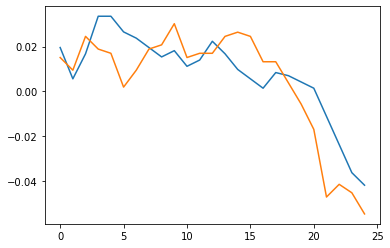

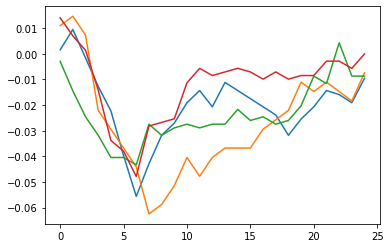

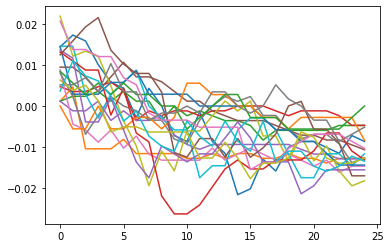

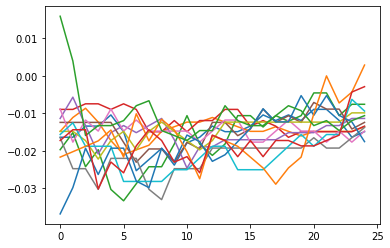

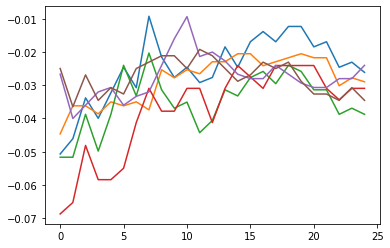

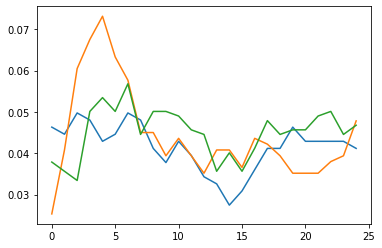

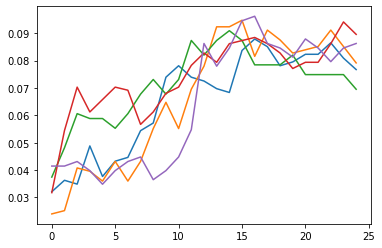

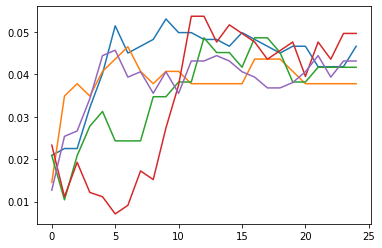

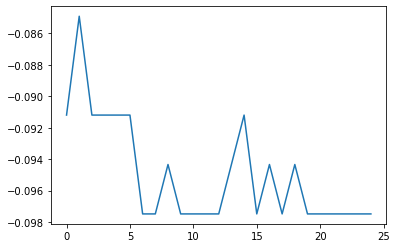

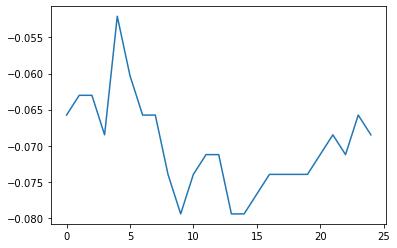

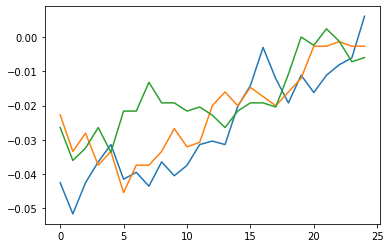

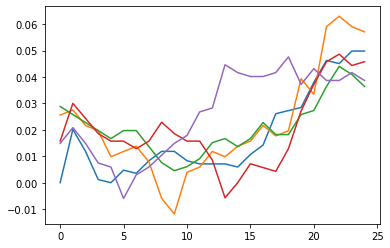

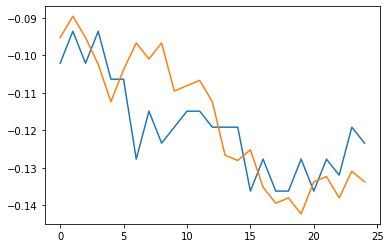

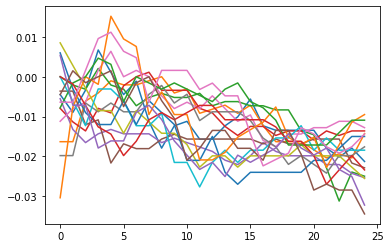

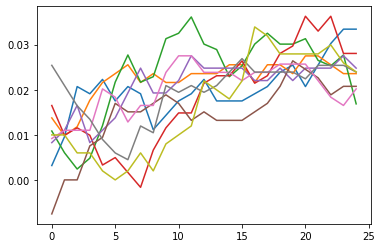

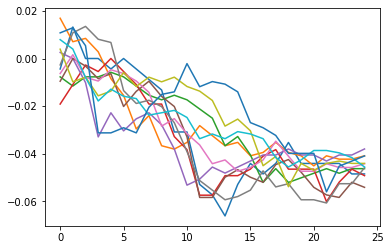

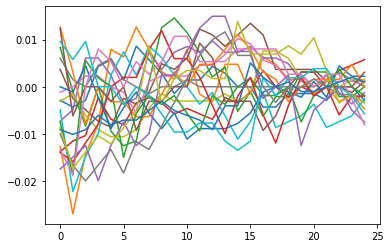

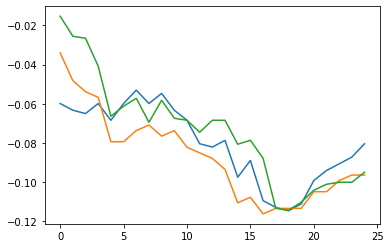

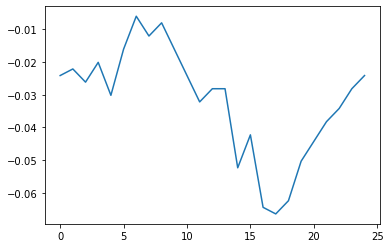

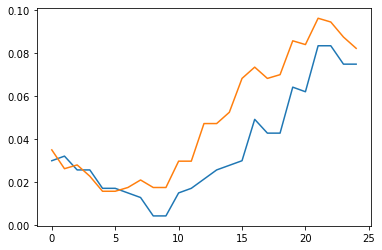

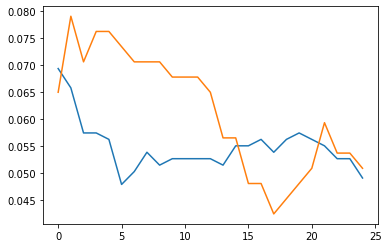

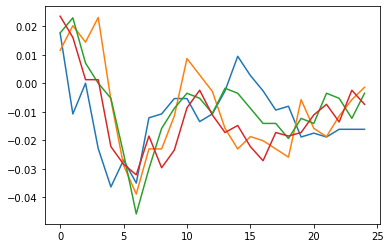

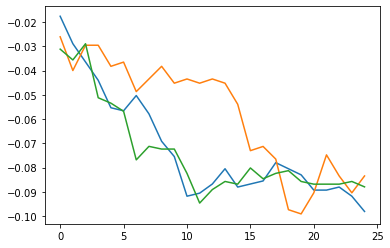

In [14]:
X_label = x_l_p
for n in range(NUM_CLUSTER):
    for i in range(len(X)):
    #     plt.subplot(10, 1, X_label[i]+1)
        if X_label[i] == n:
            plt.plot(X[i])
    plt.show()

In [47]:
profit_long_array = np.zeros(NUM_CLUSTER)
profit_short_array = np.zeros(NUM_CLUSTER)
lost_long_array = np.zeros(NUM_CLUSTER)
lost_short_array = np.zeros(NUM_CLUSTER)
num_long_array = np.zeros(NUM_CLUSTER).astype("int")
num_short_array = np.zeros(NUM_CLUSTER).astype("int")
for i in range(len(X)):
    profit_long_array[X_label[i]] += make_long_simple(Y[i], 0.002)
    profit_short_array[X_label[i]] += make_short_simple(Y[i], 0.002)
    lost_long_array[X_label[i]] += make_long_max_lost(Y[i], 0.002)
    lost_short_array[X_label[i]] += make_short_max_lost(Y[i], 0.002)
    num_long_array[X_label[i]] += 1
    num_short_array[X_label[i]] += 1
print('best avg long return',sorted(profit_long_array/num_long_array)[::-1][:10])
print('best avg short return' ,sorted(profit_short_array/num_short_array)[::-1][:10])
print('worst avg long return', sorted(lost_long_array/num_long_array)[::-1][:10])
print('worst avg short return', sorted(lost_short_array/num_short_array)[::-1][:10])
print(num_long_array)
print(num_short_array)

best avg long return [0.0513071571624328, 0.047089015729844426, 0.04081837399267333, 0.03536704681294584, 0.03363858331224168, 0.02705685166580637, 0.025661681292231446, 0.024940389813144094, 0.022750486658240372, 0.022555603736052456]
best avg short return [0.04664809118068475, 0.044421631740619215, 0.04033509639193603, 0.037362450408572105, 0.030750204042546258, 0.02918833292785127, 0.025397260273972586, 0.024867004506680706, 0.02465497356224859, 0.022366320461018954]
worst avg long return [-0.002, -0.002, -0.009423027422067364, -0.009780398041948047, -0.009785301028254999, -0.009789894734757556, -0.010082581295604841, -0.011245960166056022, -0.011945219575678718, -0.012499703166704125]
worst avg short return [-0.002, -0.004608601627334853, -0.004739726027397277, -0.007562828905146956, -0.007796327725971615, -0.007924089122291105, -0.008366704781093219, -0.008781879316099854, -0.008837606837606838, -0.009089969708517104]
[ 5 21 24  9  9  5  3 15  4  6 12 25  6 32  6  4  5  3 11 10 14

In [68]:
def find_cluster(X, X_table):
    prev_min = dtw_d(X, X_table[0])
    prev_min_arg = 0
    for i in range(1, NUM_CLUSTER):
        cur_min = dtw_d(X, X_table[i])
        if prev_min >= cur_min:
            prev_min = cur_min
            prev_min_arg = i
    return prev_min_arg

In [69]:
find_cluster(X_test[0], X_table)

9

In [89]:
profit_long_array = np.zeros(NUM_CLUSTER)
profit_short_array = np.zeros(NUM_CLUSTER)
lost_long_array = np.zeros(NUM_CLUSTER)
lost_short_array = np.zeros(NUM_CLUSTER)
num_long_array = np.zeros(NUM_CLUSTER).astype("int")
num_short_array = np.zeros(NUM_CLUSTER).astype("int")
for i in range(len(X)):
    profit_long_array[X_label[i]] += make_long(Y[i], 0.002, 0.025)
    profit_short_array[X_label[i]] += make_short(Y[i], 0.002, 0.025)
    num_long_array[X_label[i]] += 1
    num_short_array[X_label[i]] += 1
print('avg long return',sorted(profit_long_array/num_long_array)[::-1][:10])
print('avg short return' ,sorted(profit_short_array/num_short_array)[::-1][:10])
print(num_long_array)
print(num_short_array)
best_long_cluster = np.argsort(profit_long_array/num_long_array)[::-1]

avg long return [0.025, 0.02075220638153429, 0.016, 0.013877979687527478, 0.011157046324187882, 0.010967398468143924, 0.010163565929264923, 0.009204501148133622, 0.008022315060290957, 0.00542980314524474]
avg short return [0.025000000000000005, 0.025000000000000005, 0.025, 0.019358745476477684, 0.01683349878534016, 0.01456268545826534, 0.014054029304029303, 0.012098086124401962, 0.010949200991872186, 0.00992899131145823]
[ 5 21 24  9  9  5  3 15  4  6 12 25  6 32  6  4  5  3 11 10 14  5  3  2
  5 14  3  6 11  6  6  2  2  3  5  1  1  5 13  3  8 15 26  5  4  2 12  6
  4 10]
[ 5 21 24  9  9  5  3 15  4  6 12 25  6 32  6  4  5  3 11 10 14  5  3  2
  5 14  3  6 11  6  6  2  2  3  5  1  1  5 13  3  8 15 26  5  4  2 12  6
  4 10]


In [90]:
best_long_cluster

array([31, 26,  6, 34, 15, 14, 45, 37,  5, 40, 16, 30, 48, 11, 44, 12, 49,
       27, 25,  0, 35,  3, 13, 10, 17,  8,  4,  1, 43, 20, 18, 46, 23, 42,
       29, 19, 28,  7, 24, 41, 38, 47, 22, 39,  2,  9, 32, 36, 21, 33],
      dtype=int64)

In [91]:
def evaluate(X_test, Y_test, X_table):
    profit_long_array = np.zeros(NUM_CLUSTER)
    profit_short_array = np.zeros(NUM_CLUSTER)
    lost_long_array = np.zeros(NUM_CLUSTER)
    lost_short_array = np.zeros(NUM_CLUSTER)
    num_long_array = np.zeros(NUM_CLUSTER).astype("int")
    num_short_array = np.zeros(NUM_CLUSTER).astype("int")
    X_label = np.zeros(NUM_CLUSTER).astype("int")
    for i in range(len(X_test)):
        X_label = find_cluster(X_test[i], X_table)
        profit_long_array[X_label] += make_long(Y_test[i], 0.002, 0.025)
        profit_short_array[X_label] += make_short(Y_test[i], 0.002, 0.025)
        num_long_array[X_label] += 1
        num_short_array[X_label] += 1
        
        
    print('avg long return',sorted(profit_long_array/num_long_array)[::-1][:10])
    print('avg short return' ,sorted(profit_short_array/num_short_array)[::-1][:10])
    print(num_long_array)
    print(num_short_array)
    return profit_long_array, profit_short_array, num_long_array 

        

In [92]:
profit_long_array, profit_short_array, num_long_array  = evaluate(X_test, Y_test, X_table)

avg long return [0.015440715883668904, 0.012334044173648116, nan, nan, nan, 0.019008403361344545, nan, nan, nan, 0.0115]
avg short return [0.025, nan, nan, nan, 0.014995343535032823, nan, nan, nan, 0.009817233730818177, nan]
[ 1  4  7  0  0  6  9  3  0  9  2  4  0  8  6  0  0  6  0  0  0  4  5  4
  4  9  0 11  5  2  5 11  0  1  4  0  0  6  3  1  3  1  6  0  0  0  1  3
  4  5]
[ 1  4  7  0  0  6  9  3  0  9  2  4  0  8  6  0  0  6  0  0  0  4  5  4
  4  9  0 11  5  2  5 11  0  1  4  0  0  6  3  1  3  1  6  0  0  0  1  3
  4  5]


c:\users\ken32\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
c:\users\ken32\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [93]:
for i in range(NUM_CLUSTER):
    print(i, profit_long_array[i], num_long_array[i])

0 0.025 1
1 0.04283576092415878 4
2 -0.11970422502668887 7
3 0.0 0
4 0.0 0
5 0.026057259684363704 6
6 -0.052326938014386586 9
7 -0.036441804487926 3
8 0.0 0
9 -0.14901386721605825 9
10 -0.05797506234413962 2
11 -0.09285827668620582 4
12 0.0 0
13 -0.11817794181542857 8
14 -0.01666876869529109 6
15 0.0 0
16 0.0 0
17 0.09617751491173457 6
18 0.0 0
19 0.0 0
20 0.0 0
21 -0.007832563123702362 4
22 -0.032501416290798495 5
23 0.0012629810735708472 4
24 -0.09457275258474662 4
25 -0.06164855633373074 9
26 0.0 0
27 -0.24021151254187278 11
28 -0.1425783048341786 5
29 0.023 2
30 -0.07688035044227476 5
31 -0.015521988660624538 11
32 0.0 0
33 -0.006878048780487813 1
34 0.021230133080354 4
35 0.0 0
36 0.0 0
37 -0.07600466734821829 6
38 -0.02424868943275212 3
39 0.007036144578313164 1
40 -0.03794264844145504 3
41 0.019008403361344545 1
42 -0.05593325317322293 6
43 0.0 0
44 0.0 0
45 0.0 0
46 -0.0205589519650655 1
47 0.046322147651006715 3
48 0.02082642011434686 4
49 0.061670220868240574 5


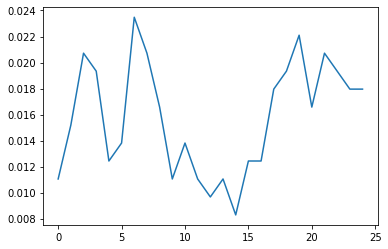

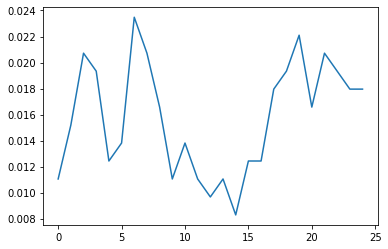

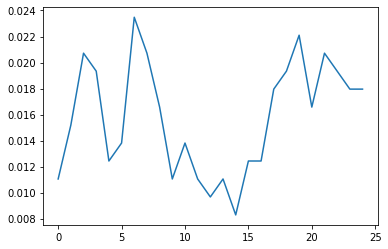

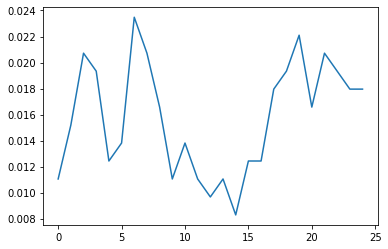

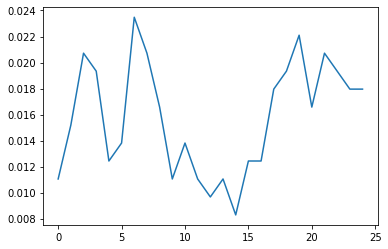

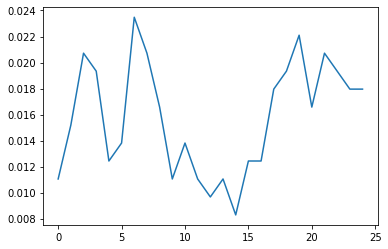

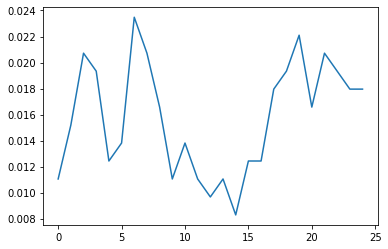

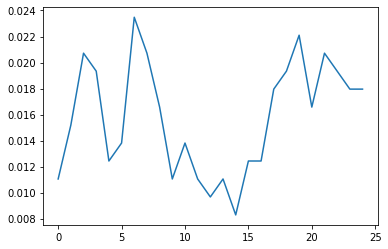

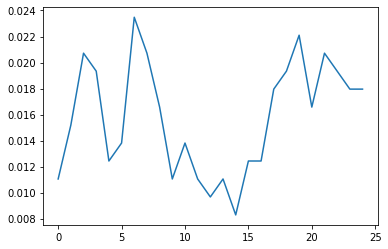

In [26]:
best_long_cluster = np.argsort(profit_long_array/num_long_array)
for n in range(10):
    for i in range(len(X)):
    #     plt.subplot(10, 1, X_label[i]+1)
        if X_label[i] == n:
            plt.plot(X[i])
    plt.show()